In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from os import walk

In [57]:
def cluster_colors(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    white_t = False
    pointw = np.array(image[300,200,0:3])
    if (pointw[0]<245 and pointw[0]>225) and (pointw[1]<245 and pointw[1]>225)  and (pointw[2]<245 and pointw[2]>225):
        white_fg = True

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = 3)
    clt.fit(image)

    ### HISTOGRAM

    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    hist = hist.astype("float")

    ### PLOTTING

    centroids = clt.cluster_centers_

    index = 0
    if white_t == False:
        for i in centroids:
            if (i[0]<237 or i[0]>225) and (i[1]<237 or i[1]>225)  and (i[2]<237 or i[2]>225):
                break
        index += 1
        centroids = np.delete(centroids,index,0)
        hist = np.delete(hist,index,0)
                

    hist /= hist.sum()

    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
            # plot the relative percentage of each cluster
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
            startX = endX
    return (bar,centroids)

In [114]:
path_list = []
for (dirpath, dirnames, filenames) in walk("C:/Users/emrem/Desktop/images_part/train/tshirt/"):
    path_list.extend(filenames)
    break
a = 30
scalas = np.zeros(shape=(a,50,300,3),dtype=np.uint8)
centroids_list = np.zeros(shape=(a,3,3),dtype=np.uint8)
for i in range(0,a,1):
    path = dirpath + path_list[i]
    bar1,centroids1 = cluster_colors(path)
    scalas[i] = bar1
    centroids_list[i] = centroids1

In [115]:
scalas = scalas.reshape(scalas.shape[0]*scalas.shape[1],300,3)

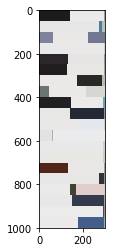

In [102]:
plt.imshow(scalas)

In [116]:
centroids_list = centroids_list.reshape(centroids_list.shape[0]*centroids_list.shape[1],3)

In [117]:
clt2 = KMeans(n_clusters = 10)
clt2.fit(centroids_list)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [118]:
centroids2 = clt2.cluster_centers_

In [119]:
numLabels = np.arange(0, len(np.unique(clt2.labels_)) + 1)
(hist, _) = np.histogram(clt2.labels_, bins = numLabels)
hist = hist.astype("float")
hist /= hist.sum()

([<matplotlib.patches.Wedge at 0x20eaa9c5320>,
 [Text(1.0199,0.412067,''),
  Text(0.646564,0.889919,''),
  Text(-0.677227,0.866812,''),
  Text(-0.988674,-0.482208,''),
  Text(-0.516419,-0.971242,''),
  Text(0.0767317,-1.09732,''),
  Text(0.516418,-0.971243,''),
  Text(0.952628,-0.55,''),
  Text(1.08329,-0.191014,''),
  Text(1.09732,-0.0767327,'')])

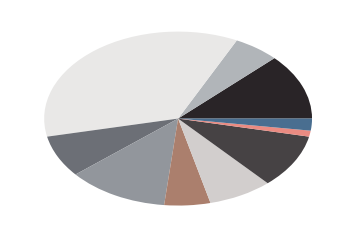

In [120]:
plt.pie(hist,colors=centroids2/255)